# Importing Libraries

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import euclidean

In [10]:
from sklearn.cluster import DBSCAN

## Generating sets of Random Points 

In [11]:
def generate_points(m, n):
    set_a = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(m)]
    set_b = [(random.uniform(-100, 100), random.uniform(-100, 100)) for _ in range(n)]
    return set_a, set_b


## Simple comparision

In [12]:
def find_close_pairs(set_a, set_b, epsilon):
    close_pairs = []
    for a_point in set_a:
        for b_point in set_b:
            distance = math.sqrt((a_point[0] - b_point[0])**2 + (a_point[1] - b_point[1])**2)
            if distance < epsilon:
                close_pairs.append((a_point, b_point))
    return close_pairs


### Implementing DBScan which is an optimal way of finding points within a specific distance, 
### It improves the time complexity of the previous brute force by avoiding unnecessary points that lie outside of the cluster

In [13]:
def find_close_pairs_with_dbscan(set_a, set_b, epsilon, min_samples):
    db_a = DBSCAN(eps=epsilon, min_samples=min_samples).fit(set_a)
    labels_a = db_a.labels_
    
    db_b = DBSCAN(eps=epsilon, min_samples=min_samples).fit(set_b)
    labels_b = db_b.labels_
    
    close_pairs = []
    
    for cluster_id in np.unique(labels_a):
        if cluster_id != -1: # Ignore noise points
            cluster_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == cluster_id]
            close_pairs.extend(find_close_pairs(cluster_a, cluster_a, epsilon))
    
   
    for cluster_id_a in np.unique(labels_a):
        if cluster_id_a != -1:
            cluster_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == cluster_id_a]
            for cluster_id_b in np.unique(labels_b):
                if cluster_id_b != -1:
                    cluster_b = [set_b[i] for i in range(len(set_b)) if labels_b[i] == cluster_id_b]
                    close_pairs.extend(find_close_pairs(cluster_a, cluster_b, epsilon))
    
    noise_a = [set_a[i] for i in range(len(set_a)) if labels_a[i] == -1]
    noise_b = [set_b[i] for i in range(len(set_b)) if labels_b[i] == -1]
    close_pairs.extend(find_close_pairs(noise_a, set_b, epsilon))
    close_pairs.extend(find_close_pairs(set_a, noise_b, epsilon))
    
    return close_pairs, labels_a, labels_b


# We plot graph for each cluster formed as well as show the distance between the pairs

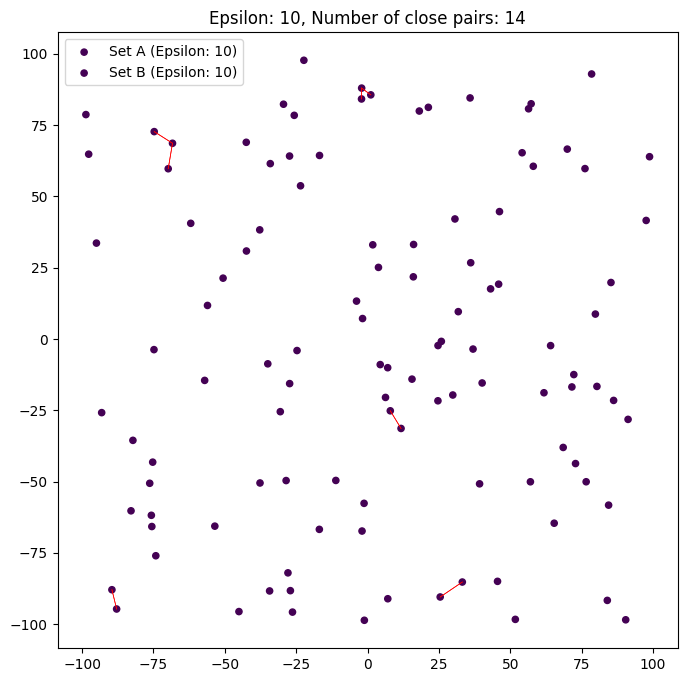

Epsilon: 10, Number of close pairs: 14
Pair: (-74.72156418491558, 72.70877469137682) <--> (-68.31738119866216, 68.62320197436625)
Pair: (-74.72156418491558, 72.70877469137682) <--> (-68.31738119866216, 68.62320197436625), Distance: 7.596411267657828
Pair: (-69.82012416151929, 59.69155921981306) <--> (-68.31738119866216, 68.62320197436625)
Pair: (-69.82012416151929, 59.69155921981306) <--> (-68.31738119866216, 68.62320197436625), Distance: 9.05717829720599
Pair: (-87.8901616583997, -94.69276184298035) <--> (-89.54093304548887, -87.93327995704902)
Pair: (-87.8901616583997, -94.69276184298035) <--> (-89.54093304548887, -87.93327995704902), Distance: 6.958134918113183
Pair: (1.1577188273112995, 85.60119667782166) <--> (-2.0515398172024675, 87.96902881735764)
Pair: (1.1577188273112995, 85.60119667782166) <--> (-2.0515398172024675, 87.96902881735764), Distance: 3.988228941322936
Pair: (33.21355545633085, -85.23396444584819) <--> (25.463097630635815, -90.4764882227594)
Pair: (33.2135554563308

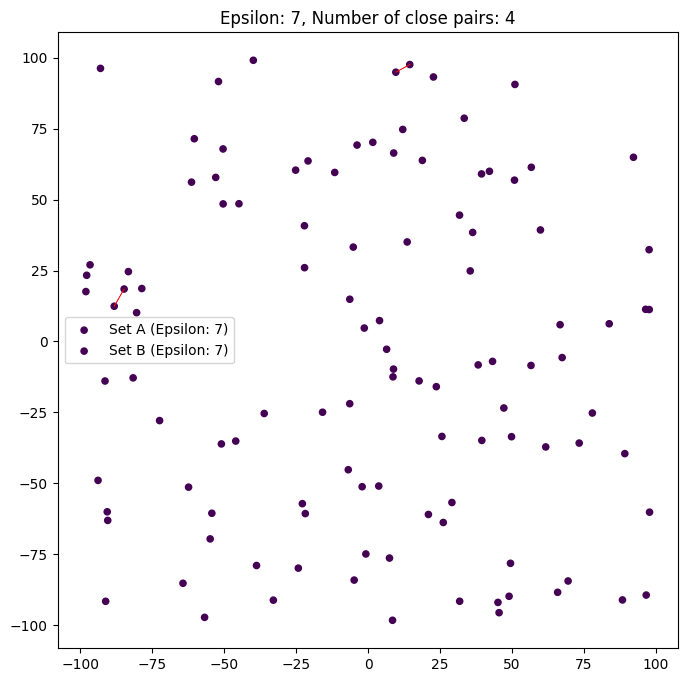

Epsilon: 7, Number of close pairs: 4
Pair: (-84.80339645501047, 18.49598596400375) <--> (-88.2411953194393, 12.424493648046095)
Pair: (-84.80339645501047, 18.49598596400375) <--> (-88.2411953194393, 12.424493648046095), Distance: 6.977211475582562
Pair: (9.598320133051018, 94.9346673867538) <--> (14.441683963036908, 97.63373080380637)
Pair: (9.598320133051018, 94.9346673867538) <--> (14.441683963036908, 97.63373080380637), Distance: 5.544647555876486
Pair: (-84.80339645501047, 18.49598596400375) <--> (-88.2411953194393, 12.424493648046095)
Pair: (-84.80339645501047, 18.49598596400375) <--> (-88.2411953194393, 12.424493648046095), Distance: 6.977211475582562
Pair: (9.598320133051018, 94.9346673867538) <--> (14.441683963036908, 97.63373080380637)
Pair: (9.598320133051018, 94.9346673867538) <--> (14.441683963036908, 97.63373080380637), Distance: 5.544647555876486


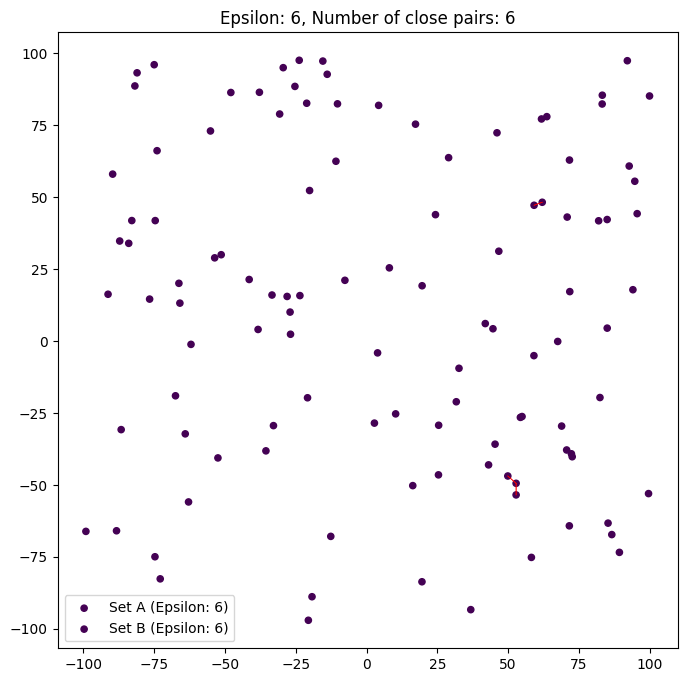

Epsilon: 6, Number of close pairs: 6
Pair: (49.86785771557433, -46.87802614934671) <--> (52.80144347170642, -49.42465550045303)
Pair: (49.86785771557433, -46.87802614934671) <--> (52.80144347170642, -49.42465550045303), Distance: 3.8847453507916407
Pair: (52.79811817426912, -53.4491856607348) <--> (52.80144347170642, -49.42465550045303)
Pair: (52.79811817426912, -53.4491856607348) <--> (52.80144347170642, -49.42465550045303), Distance: 4.024531534057183
Pair: (62.02287218425326, 48.23219171096781) <--> (59.14572633460551, 47.1876179852685)
Pair: (62.02287218425326, 48.23219171096781) <--> (59.14572633460551, 47.1876179852685), Distance: 3.0608989706565923
Pair: (49.86785771557433, -46.87802614934671) <--> (52.80144347170642, -49.42465550045303)
Pair: (49.86785771557433, -46.87802614934671) <--> (52.80144347170642, -49.42465550045303), Distance: 3.8847453507916407
Pair: (52.79811817426912, -53.4491856607348) <--> (52.80144347170642, -49.42465550045303)
Pair: (52.79811817426912, -53.4491

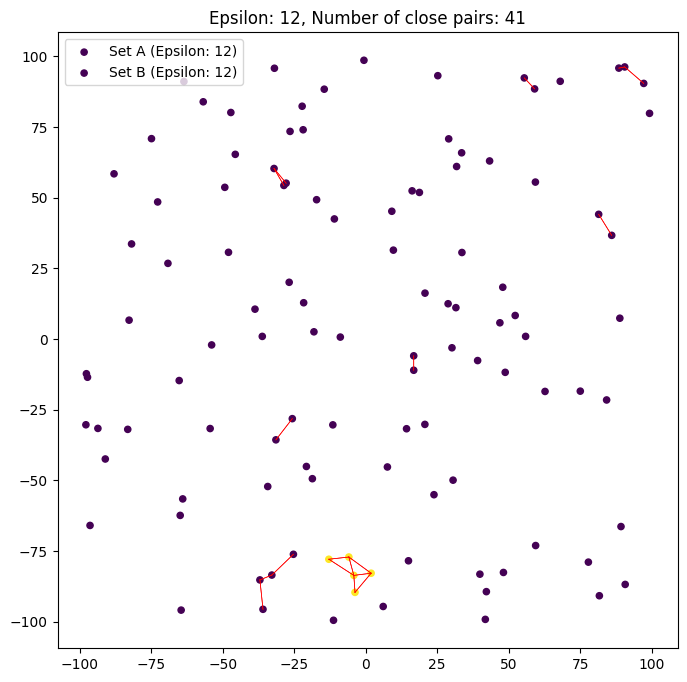

Epsilon: 12, Number of close pairs: 41
Pair: (-5.913167037133874, -77.1125860285149) <--> (-5.913167037133874, -77.1125860285149)
Pair: (-5.913167037133874, -77.1125860285149) <--> (-5.913167037133874, -77.1125860285149), Distance: 0.0
Pair: (-5.913167037133874, -77.1125860285149) <--> (-12.908044893845982, -77.90119163035776)
Pair: (-5.913167037133874, -77.1125860285149) <--> (-12.908044893845982, -77.90119163035776), Distance: 7.039191361625234
Pair: (-5.913167037133874, -77.1125860285149) <--> (1.8730923133895914, -82.84290806886057)
Pair: (-5.913167037133874, -77.1125860285149) <--> (1.8730923133895914, -82.84290806886057), Distance: 9.667596669270262
Pair: (-5.913167037133874, -77.1125860285149) <--> (-4.170270450527511, -83.6094842289071)
Pair: (-5.913167037133874, -77.1125860285149) <--> (-4.170270450527511, -83.6094842289071), Distance: 6.7266168865086735
Pair: (-12.908044893845982, -77.90119163035776) <--> (-5.913167037133874, -77.1125860285149)
Pair: (-12.908044893845982, -77

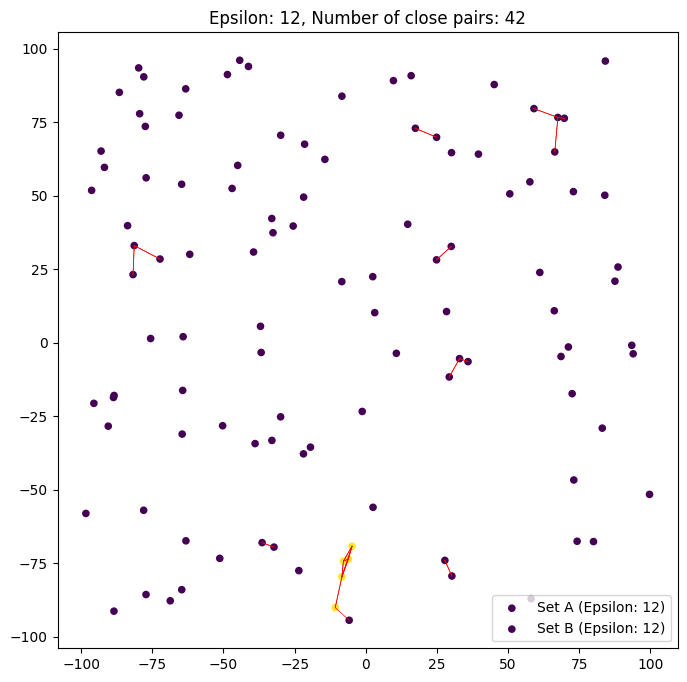

Epsilon: 12, Number of close pairs: 42
Pair: (-8.385485200925501, -79.60375630281497) <--> (-8.385485200925501, -79.60375630281497)
Pair: (-8.385485200925501, -79.60375630281497) <--> (-8.385485200925501, -79.60375630281497), Distance: 0.0
Pair: (-8.385485200925501, -79.60375630281497) <--> (-6.095205985963716, -73.58706886443196)
Pair: (-8.385485200925501, -79.60375630281497) <--> (-6.095205985963716, -73.58706886443196), Distance: 6.4378495333210415
Pair: (-8.385485200925501, -79.60375630281497) <--> (-4.842591962108344, -69.22788838029679)
Pair: (-8.385485200925501, -79.60375630281497) <--> (-4.842591962108344, -69.22788838029679), Distance: 10.964065288349852
Pair: (-8.385485200925501, -79.60375630281497) <--> (-7.851784443949555, -74.27334508196668)
Pair: (-8.385485200925501, -79.60375630281497) <--> (-7.851784443949555, -74.27334508196668), Distance: 5.3570626542296536
Pair: (-8.385485200925501, -79.60375630281497) <--> (-10.731057039918142, -90.09216239378979)
Pair: (-8.38548520

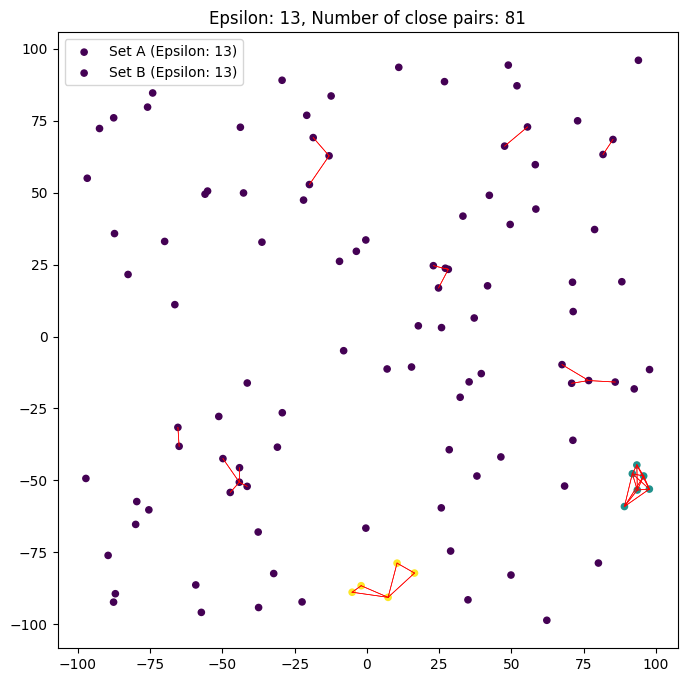

Epsilon: 13, Number of close pairs: 81
Pair: (89.08290226775713, -59.051682190445455) <--> (89.08290226775713, -59.051682190445455)
Pair: (89.08290226775713, -59.051682190445455) <--> (89.08290226775713, -59.051682190445455), Distance: 0.0
Pair: (89.08290226775713, -59.051682190445455) <--> (97.69801989708392, -52.99681127918632)
Pair: (89.08290226775713, -59.051682190445455) <--> (97.69801989708392, -52.99681127918632), Distance: 10.530038628568715
Pair: (89.08290226775713, -59.051682190445455) <--> (91.8079785864511, -47.6564577134962)
Pair: (89.08290226775713, -59.051682190445455) <--> (91.8079785864511, -47.6564577134962), Distance: 11.716534548353879
Pair: (89.08290226775713, -59.051682190445455) <--> (95.7331196911243, -48.44926393079805)
Pair: (89.08290226775713, -59.051682190445455) <--> (95.7331196911243, -48.44926393079805), Distance: 12.51545703242838
Pair: (89.08290226775713, -59.051682190445455) <--> (93.53302854824173, -53.318828440427964)
Pair: (89.08290226775713, -59.05

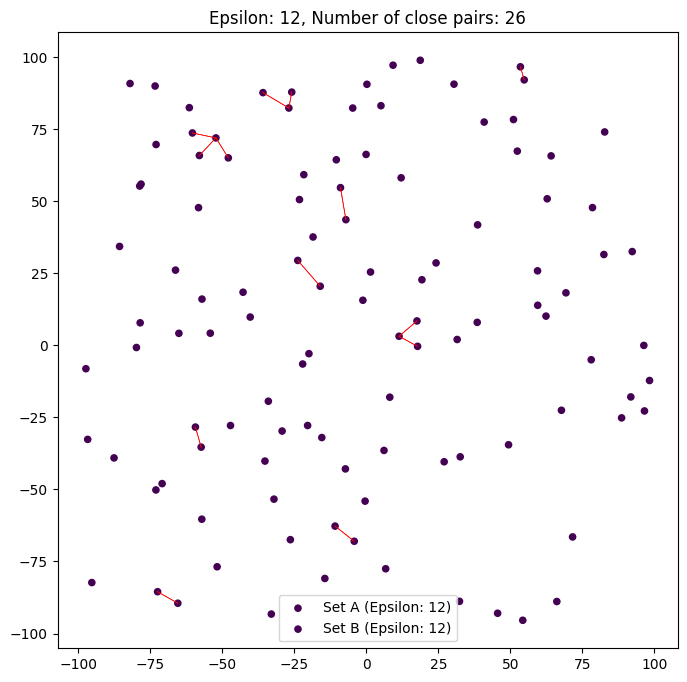

Epsilon: 12, Number of close pairs: 26
Pair: (-8.9625346242983, 54.71019832754078) <--> (-7.086249991442898, 43.590448864834656)
Pair: (-8.9625346242983, 54.71019832754078) <--> (-7.086249991442898, 43.590448864834656), Distance: 11.276935405368006
Pair: (-25.891856978028315, 87.85899789923201) <--> (-26.89416375809624, 82.33543784301801)
Pair: (-25.891856978028315, 87.85899789923201) <--> (-26.89416375809624, 82.33543784301801), Distance: 5.6137629604368655
Pair: (-59.35452830543115, -28.369623982277602) <--> (-57.358030937516055, -35.321951921873705)
Pair: (-59.35452830543115, -28.369623982277602) <--> (-57.358030937516055, -35.321951921873705), Distance: 7.233316356954153
Pair: (54.85361132285877, 92.1005732736686) <--> (53.52782407508042, 96.64174674873254)
Pair: (54.85361132285877, 92.1005732736686) <--> (53.52782407508042, 96.64174674873254), Distance: 4.730747124608968
Pair: (-60.40018836100203, 73.68331281746006) <--> (-52.231863838010064, 71.96511089072149)
Pair: (-60.40018836

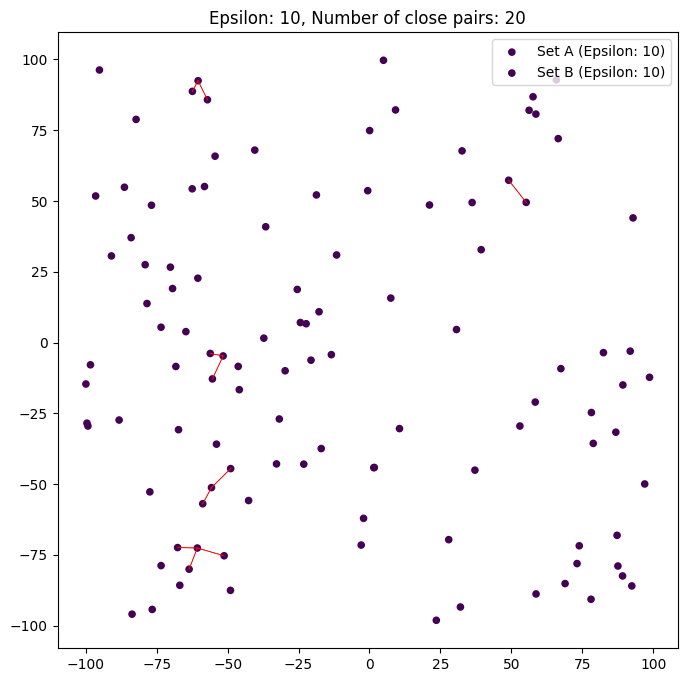

Epsilon: 10, Number of close pairs: 20
Pair: (49.078613068763275, 57.333059508761494) <--> (55.254415428622536, 49.50645402283084)
Pair: (49.078613068763275, 57.333059508761494) <--> (55.254415428622536, 49.50645402283084), Distance: 9.969768714490977
Pair: (-58.76619036552957, -56.96310278218735) <--> (-55.681542971378725, -51.25485839443431)
Pair: (-58.76619036552957, -56.96310278218735) <--> (-55.681542971378725, -51.25485839443431), Distance: 6.488382197170237
Pair: (-63.56782495179951, -80.08445117377161) <--> (-60.663907808682026, -72.60653576528674)
Pair: (-63.56782495179951, -80.08445117377161) <--> (-60.663907808682026, -72.60653576528674), Distance: 8.021966942748337
Pair: (-51.57569909023791, -4.748008945134899) <--> (-56.11247613494355, -3.8677667104117575)
Pair: (-51.57569909023791, -4.748008945134899) <--> (-56.11247613494355, -3.8677667104117575), Distance: 4.621382081710882
Pair: (-51.57569909023791, -4.748008945134899) <--> (-55.357083632625084, -12.865127657943702)
Pa

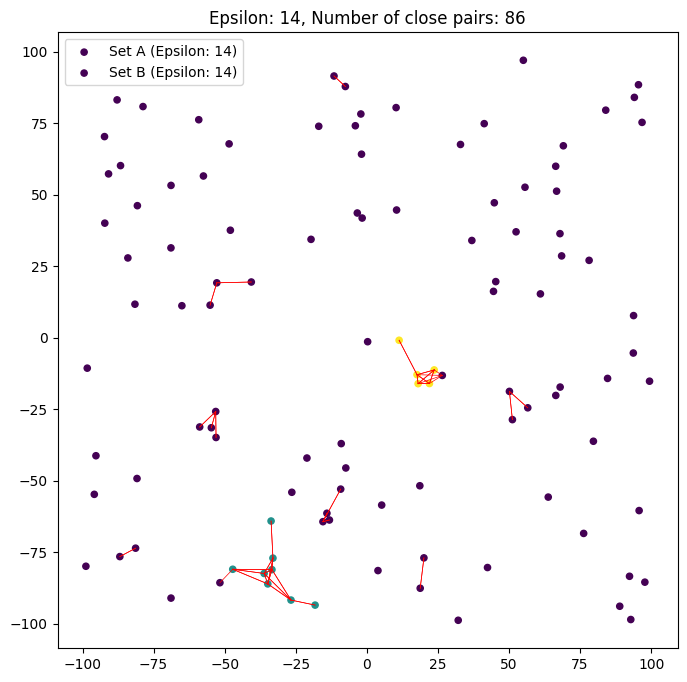

Epsilon: 14, Number of close pairs: 86
Pair: (-33.37711850662235, -81.06406365730751) <--> (-33.37711850662235, -81.06406365730751)
Pair: (-33.37711850662235, -81.06406365730751) <--> (-33.37711850662235, -81.06406365730751), Distance: 0.0
Pair: (-33.37711850662235, -81.06406365730751) <--> (-36.119735329951496, -82.40056581644373)
Pair: (-33.37711850662235, -81.06406365730751) <--> (-36.119735329951496, -82.40056581644373), Distance: 3.0509318348635404
Pair: (-33.37711850662235, -81.06406365730751) <--> (-34.839156701320405, -86.05310232033135)
Pair: (-33.37711850662235, -81.06406365730751) <--> (-34.839156701320405, -86.05310232033135), Distance: 5.198852033276441
Pair: (-33.37711850662235, -81.06406365730751) <--> (-33.02224411909968, -77.04454270280542)
Pair: (-33.37711850662235, -81.06406365730751) <--> (-33.02224411909968, -77.04454270280542), Distance: 4.035156073140301
Pair: (-33.37711850662235, -81.06406365730751) <--> (-26.676525599495008, -91.70041842169636)
Pair: (-33.37711

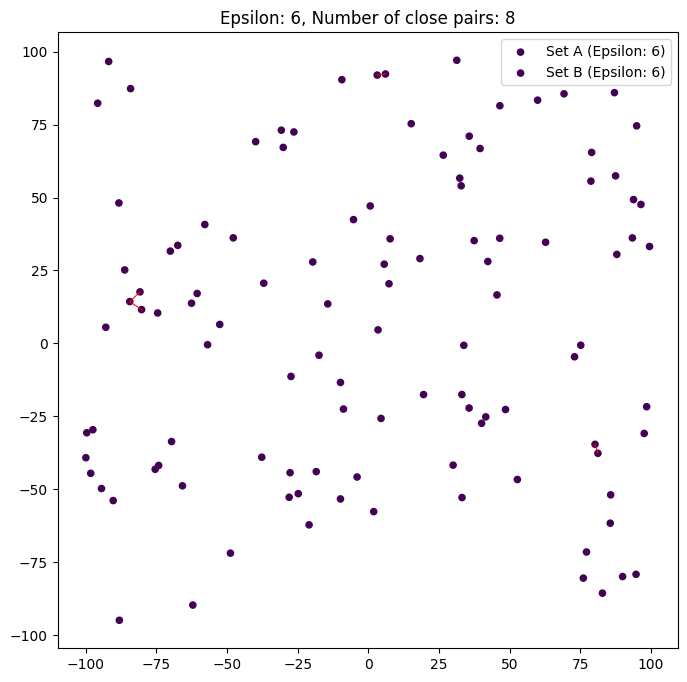

Epsilon: 6, Number of close pairs: 8
Pair: (80.18759907336153, -34.57354871373752) <--> (81.21137959566403, -37.66341738111332)
Pair: (80.18759907336153, -34.57354871373752) <--> (81.21137959566403, -37.66341738111332), Distance: 3.2550598979860057
Pair: (-80.18839535002186, 11.588456127855068) <--> (-84.3701941623548, 14.352880709516342)
Pair: (-80.18839535002186, 11.588456127855068) <--> (-84.3701941623548, 14.352880709516342), Distance: 5.012931734476575
Pair: (-80.75591775386187, 17.672048643479116) <--> (-84.3701941623548, 14.352880709516342)
Pair: (-80.75591775386187, 17.672048643479116) <--> (-84.3701941623548, 14.352880709516342), Distance: 4.907124385099214
Pair: (6.066461447020984, 92.35111649741324) <--> (3.1422957765371535, 91.97249189834383)
Pair: (6.066461447020984, 92.35111649741324) <--> (3.1422957765371535, 91.97249189834383), Distance: 2.9485761742672723
Pair: (80.18759907336153, -34.57354871373752) <--> (81.21137959566403, -37.66341738111332)
Pair: (80.18759907336153

In [14]:
 # Sample input for performance
m = 100
n = 10
min_samples = 5
for _ in range(10):
    epsilon = random.randint(5, 15)
    set_a, set_b = generate_points(m, n)
    close_pairs,labels_a, labels_b = find_close_pairs_with_dbscan(set_a, set_b, epsilon, min_samples)
    fig, ax = plt.subplots(figsize=(8, 8))
    
  
    ax.scatter([p[0] for p in set_a], [p[1] for p in set_a], c=[labels_a[i] for i in range(len(set_a))], s=20, label=f"Set A (Epsilon: {epsilon})")
    
   
    ax.scatter([p[0] for p in set_b], [p[1] for p in set_b], c=[labels_b[i] for i in range(len(set_b))], s=20, label=f"Set B (Epsilon: {epsilon})")
    
    
    for pair in close_pairs:
        ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color='r', linewidth=0.5)
    
    ax.set_title(f"Epsilon: {epsilon}, Number of close pairs: {len(close_pairs)}")
    ax.legend()
    plt.show()
    print(f"Epsilon: {epsilon}, Number of close pairs: {len(close_pairs)}")
    for pair in close_pairs:
        print(f"Pair: {pair[0]} <--> {pair[1]}")
        distance = euclidean(pair[0], pair[1])
        print(f"Pair: {pair[0]} <--> {pair[1]}, Distance: {distance}")